# 1. Import Libraries

In [1]:
# Import necessary libraries for working with zip files
from zipfile import ZipFile

# Import machine learning libraries for clustering and evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import library for data preprocessing (standard scaling)
from sklearn.preprocessing import StandardScaler

# Import plotting libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is a statistical data visualization library

# Import numerical computation libraries
import numpy as np
import pandas as pd  # Pandas is a powerful data manipulation library

# Import libraries for measuring similarity and working with matrices
from sklearn.metrics.pairwise import cosine_similarity
import operator  # Operator module provides a set of convenient built-in functions

# 2. Load Data

## **2.1 Load Anime Data**

In [2]:
url_animes = "https://raw.githubusercontent.com/nuraulaola/Anime-Recommendation-System/main/Datasets/anime.csv"
animes = pd.read_csv(url_animes)
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


**Content**

*   anime_id - myanimelist.net's unique id identifying an anime.

* name - full name of anime.

* genre - comma separated list of genres for this anime.

* type - movie, TV, OVA, etc.

* episodes - how many episodes in this show. (1 if movie).

* rating - average rating out of 10 for this anime.

* members - number of community members that are in this anime's
"group".

## **2.2 Load Ratings Data**

In [3]:
url_ratings = "https://raw.githubusercontent.com/nuraulaola/Anime-Recommendation-System/main/Datasets/rating.csv"
ratings = pd.read_csv(url_ratings)
ratings = ratings[ratings["rating"] != -1]
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


**Content**

* user_id - non identifiable randomly generated user id.

* anime_id - the anime that this user has rated.

* rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

# **3. Data Exploration**

## **3.1 Explore Anime Data**

### **3.1.1 Display Type Counts and Visualize Distribution**

Anime Type Counts:
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64


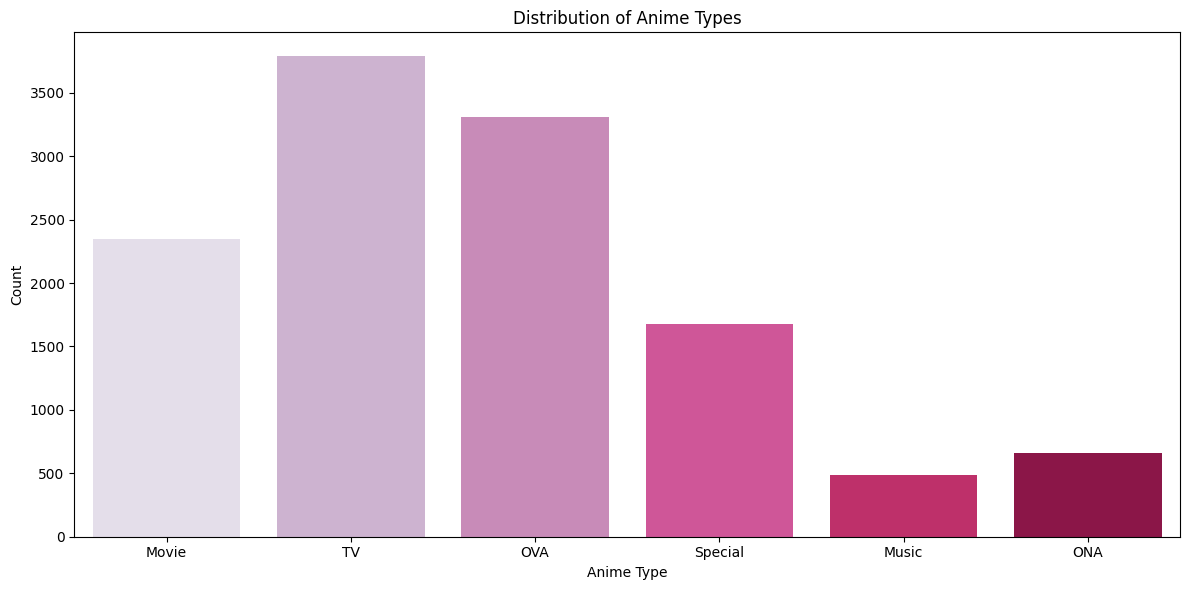

In [ ]:
# Display the count of each unique value in the 'type' column
animes_type_counts = animes['type'].value_counts()
print("Anime Type Counts:")
print(animes_type_counts)

# Plot the count of each unique value in the 'type' column
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=animes, palette='PuRd')
plt.title('Distribution of Anime Types')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


1. **TV Series Dominance:**
- TV series (TV) is the most common type of anime, with 3787 instances.
- This suggests that TV series are a prevalent and popular.

2. **Diversity in Formats:**
- The dataset includes a variety of anime types, such as OVA (Original Video Animation), Movie, Special, ONA (Original Net Animation), and Music.
- The diversity in types indicates a wide range of storytelling formats and genres.

3. **Significance of OVA:**
- OVA is the second most common type, with 3311 instances.
- OVAs are often standalone episodes or series released directly to home video, indicating a significant presence of non-broadcast content.

4. **Movie Production:**
- Movies are also a substantial category, with 2348 instances.
- The presence of a large number of anime movies suggests a vibrant film industry within the anime genre.

5. **Special and Unique Productions:**
- The Special category, with 1676 instances, may include one-shot episodes, specials, or unique productions outside the standard TV series and movies.
- ONA (Original Net Animation) and Music categories are also present, indicating a diversity of content delivery methods and themes.

### **3.1.2 Display General Information and Summary Statistics**

In [ ]:
# Display general information about the 'animes' DataFrame
print("\nAnime DataFrame Info:")
print(animes[['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']].info())

# Display summary statistics for the 'rating' and 'members' columns
animes_rating_members_summary = animes[['rating', 'members']].describe()
print("\nRating and Members Summary:")
print(animes_rating_members_summary)


Anime DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

Rating and Members Summary:
             rating       members
count  12064.000000  1.229400e+04
mean       6.473902  1.807134e+04
std        1.026746  5.482068e+04
min        1.670000  5.000000e+00
25%        5.880000  2.250000e+02
50%        6.570000  1.550000e+03
75%        7.180000  9.437000e+03
max       10.000000  1.013917e+06


1. **Data Overview:**
- The Anime DataFrame contains 12,294 entries and 7 columns.
- Columns include 'anime_id,' 'name,' 'genre,' 'type,' 'episodes,' 'rating,' and 'members.'

2. **Missing Values:**
- The 'genre' column has some missing values (62 entries).
- The 'type' column also has a few missing values (25 entries).

3. **Data Types:**
- 'anime_id' and 'members' are of type int64.
- 'rating' is of type float64.
- 'name,' 'genre,' 'type,' and 'episodes' are of type object (likely strings).

4. **Summary Statistics:**
- The 'rating' column has a count of 12,064 non-null entries, indicating some missing ratings.
- The mean rating is approximately 6.47, suggesting that, on average, anime in the dataset is well-received.
- The 'members' column represents the number of community members who have added the anime to their lists, with a mean of approximately 18,071.

5. **Rating Distribution:**
- The rating distribution ranges from a minimum of 1.67 to a maximum of 10.00.
- The majority of ratings fall within the 5.88 to 7.18 range (25th to 75th percentiles).
- This indicates a diverse range of anime with varying degrees of popularity.

6. **Members Distribution**
- The 'members' column has a wide range, with a minimum of 5 and a maximum of over 1 million.
- The distribution is positively skewed, suggesting that there are a few anime with exceptionally high member counts.

### **3.1.3 Visualize Distribution of Ratings and Members**

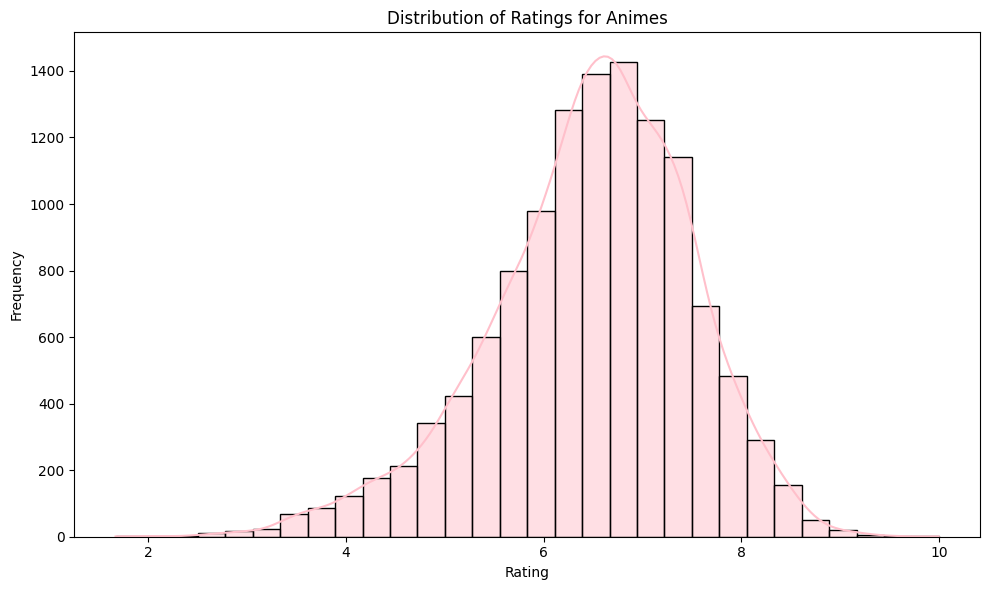

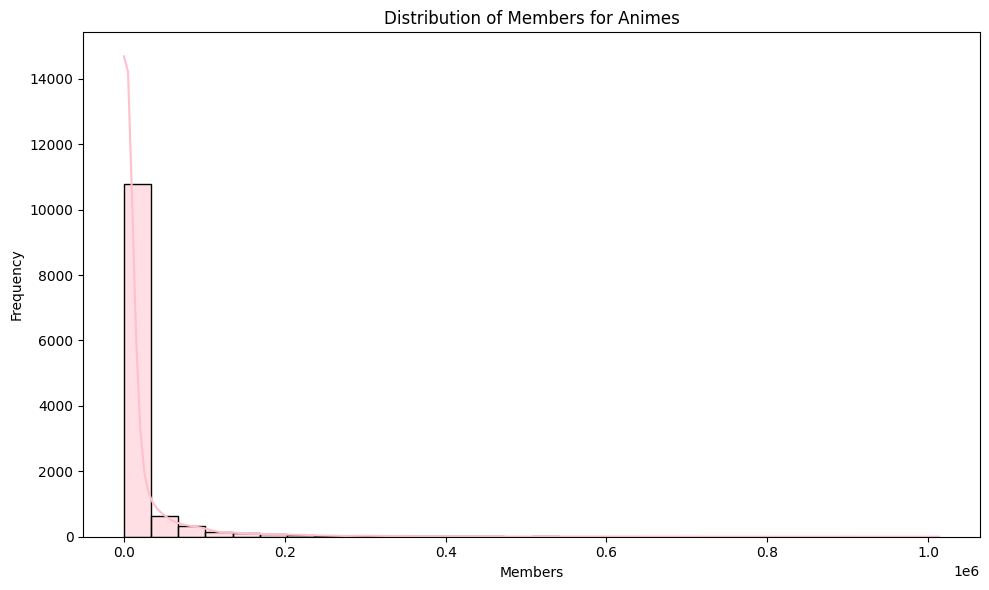

In [ ]:
# Visualize summary statistics for the 'rating' column
plt.figure(figsize=(10, 6))
sns.histplot(animes['rating'], bins=30, kde=True, color='pink')
plt.title('Distribution of Ratings for Animes')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize summary statistics for the 'members' column
plt.figure(figsize=(10, 6))
sns.histplot(animes['members'], bins=30, kde=True, color='pink')
plt.title('Distribution of Members for Animes')
plt.xlabel('Members')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

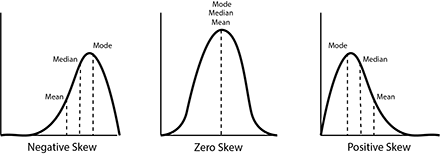

1. **Distribution of Ratings for Animes:**
- Based on that guide, the distribution of ratings for animes is a left-skewed distribution with a longer left side of its peak than on its right.
- While the bulk of animes receive higher ratings, the presence of a left-skewed distribution suggests the existence of some animes with lower ratings.

2. **Distribution of Members for Animes**
- The distribution of members for animes shows an exponential distribution.
- This could suggest that certain shows gain popularity rapidly or decline sharply over time, rather than having a uniform or linear distribution of viewership.

### **3.1.4 Display Genre Counts and Visualize Top Genres**


Anime Genre Counts:
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3264, dtype: int64


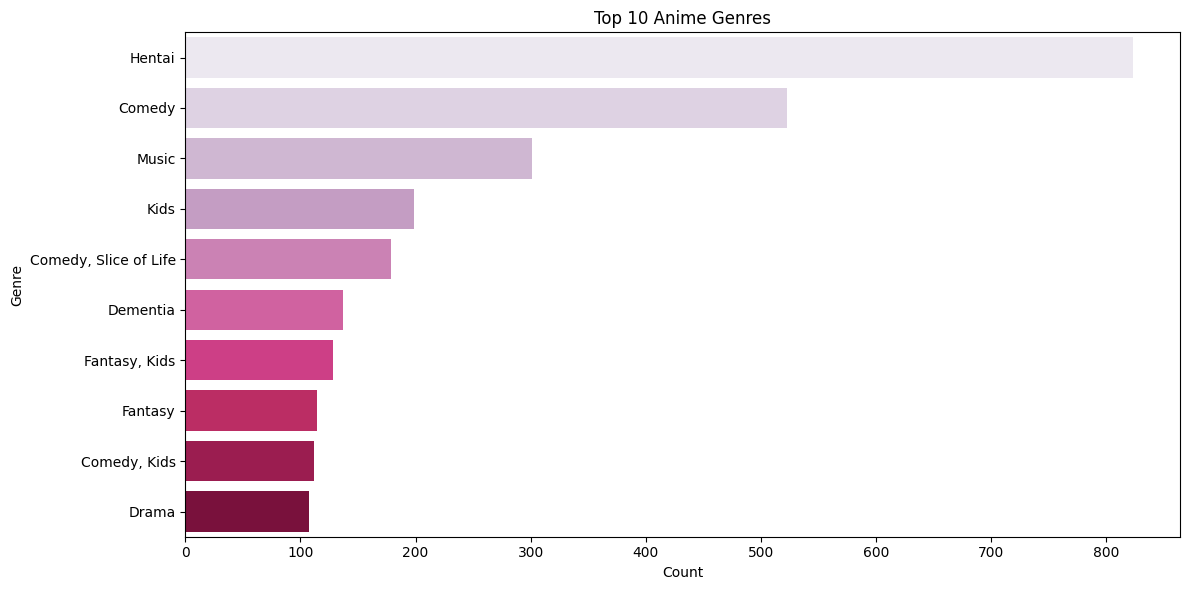

In [ ]:
# Display the count of each unique value in the 'genre' column
animes_genre_counts = animes['genre'].value_counts()
print("\nAnime Genre Counts:")
print(animes_genre_counts)

# Visualize the top N genres
animes_top_genres = animes_genre_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=animes_top_genres.values, y=animes_top_genres.index, palette='PuRd')
plt.title('Top 10 Anime Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

1. **Popularity of Genres:**
- **Hentai:** It appears to be the most popular genre based on the highest count.
- **Comedy:** Follows as the second most popular genre, with a significant number of shows.
- **Music:** Indicates a relatively high interest in anime centered around musical themes.

2. **Target Audience:**
- **Kids:** The genres "Kids" and "Fantasy, Kids" suggest a presence of content specifically designed for a younger audience.

3. **Genre Overlaps:**
- **Comedy, Slice of Life:** There is a genre overlap, indicating that comedic elements are often combined with a slice-of-life theme.
- **Fantasy, Kids:** Another instance of genre combination, suggesting fantasy content tailored for children.

4. **Niche Genres:**
- **Dementia:** This is a less common genre, indicating a niche interest in shows that may explore psychological or surreal themes.

5. **Diversity in Preferences:**
The list includes a variety of genres, reflecting the diversity of preferences among anime viewers.

### **3.1.5 Visualize Correlation Heatmap for Numerical Features**

<ipython-input-8-383a0bc65d98>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  animes_correlation_matrix = animes[animes_numerical_features].corr()


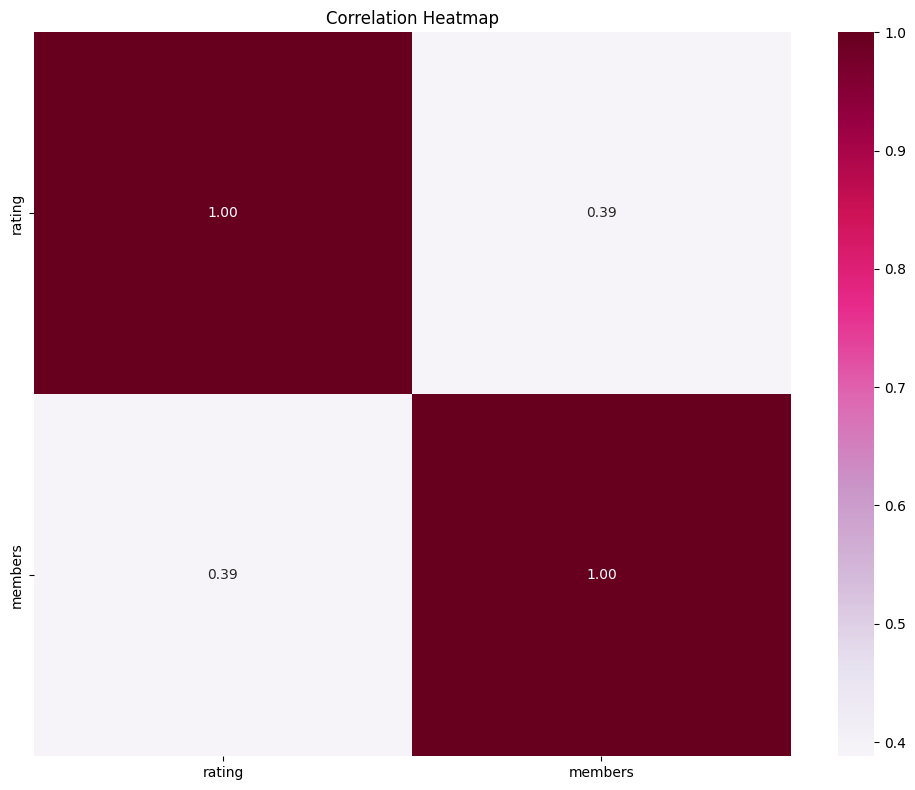

In [ ]:
# Display a correlation heatmap for numerical features
animes_numerical_features = ['rating', 'members', 'episodes']
animes_correlation_matrix = animes[animes_numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(animes_correlation_matrix, annot=True, cmap='PuRd', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

1. **Moderate Positive Correlation:**
- There is a positive correlation of approximately 0.39 between "rating" and "members."
- This suggests that there is a moderate tendency for anime with higher ratings to also have a larger number of members.

2. **Interdependence:**
- The positive correlation indicates that as one variable (e.g., "rating") increases, the other variable (e.g., "members") tends to increase as well, and vice versa.

3. **Viewer Engagement:**
- Anime with higher ratings might attract more members, indicating a positive relationship between audience ratings and the size of the viewership.

## **3.2 Explore Ratings Data**

### **3.2.1 Display Rating Counts and Visualize Distribution**

Rating Counts:
rating
1       16649
2       23150
3       41453
4      104291
5      282806
6      637775
7     1375287
8     1646019
9     1254096
10     955715
Name: rating, dtype: int64


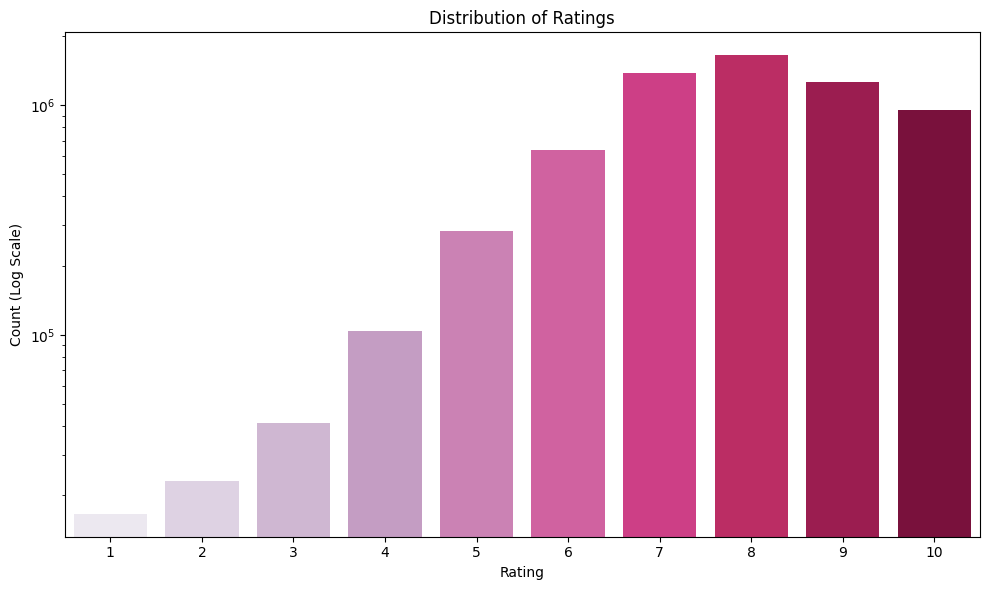

In [ ]:
# Display the count of each unique rating value
ratings_rating_counts = ratings.groupby("rating")["rating"].count()
print("Rating Counts:")
print(ratings_rating_counts)

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings, palette='PuRd')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.tight_layout()
plt.show()

1. **Distribution of Ratings:**
- The majority of the ratings seem to be in the higher range, with a significant number of ratings falling in the 6 to 10 range. This indicates that a substantial portion of the audience tends to rate anime positively.

2. **Popularity of Higher-Rated Anime:**
- Anime with ratings in the higher range (7 to 10) have a considerable number of ratings, indicating a popular and well-received category among the audience.

### **3.2.2 Display Total Number of Ratings and Unique User/Anime IDs**

In [ ]:
# Display the total number of ratings
ratings_total_ratings = len(ratings)
print("Total Number of Ratings:", ratings_total_ratings)

# Display the total number of unique user IDs
ratings_unique_user_ids = len(ratings['user_id'].unique())
print("\nTotal Number of Unique User IDs:", ratings_unique_user_ids)

# Display the total number of unique anime IDs
ratings_unique_anime_ids = len(ratings['anime_id'].unique())
print("\nTotal Number of Unique Anime IDs:", ratings_unique_anime_ids)

Total Number of Ratings: 6337241

Total Number of Unique User IDs: 69600

Total Number of Unique Anime IDs: 9927


1. **User Engagement:**
- With 6,336,241 total ratings, there is a substantial level of user engagement on the platform. This indicates an active user base that is actively participating in rating anime.

2. **Diversity of Anime Content:**
- The presence of 9,927 unique anime IDs suggests a diverse range of anime content on the platform. This diversity could cater to a wide variety of tastes and preferences among users.

3. **User Base Size:**
- The platform has been accessed by 69,600 unique user IDs. Knowing the size of the user base is crucial for understanding the reach and impact of the platform.

### **3.2.3 Display Average Ratings per User and per Anime**

In [ ]:
# Display the average number of ratings per user
ratings_average_ratings_per_user = ratings.groupby('user_id')['rating'].count().mean()
print("Average Ratings per User:", ratings_average_ratings_per_user)

# Display the average number of ratings per anime
ratings_average_ratings_per_anime = ratings.groupby('anime_id')['rating'].count().mean()
print("\nAverage Ratings per Anime:", ratings_average_ratings_per_anime)

Average Ratings per User: 91.05231321839081

Average Ratings per Anime: 638.3843054296364


1. **Average Ratings per User (91.05):**
- The average user has given approximately 91 ratings. This suggests a moderate level of user engagement. Users are actively participating in rating anime, contributing to a diverse set of opinions.

2. **Average Ratings per Anime (638.38):**
- The average anime has received around 638 ratings. This indicates a relatively high level of attention and interest in individual anime titles. Higher average ratings per anime could suggest that a substantial number of users are watching and expressing their opinions on a wide variety of anime.

### **3.2.4 Visualize Distribution of Ratings Posted per User and per Anime**

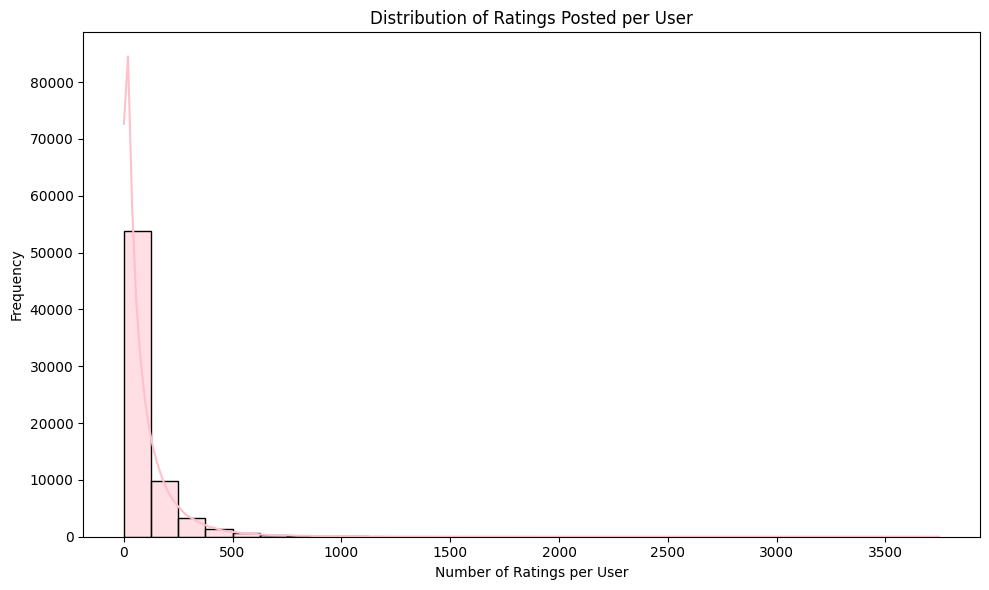

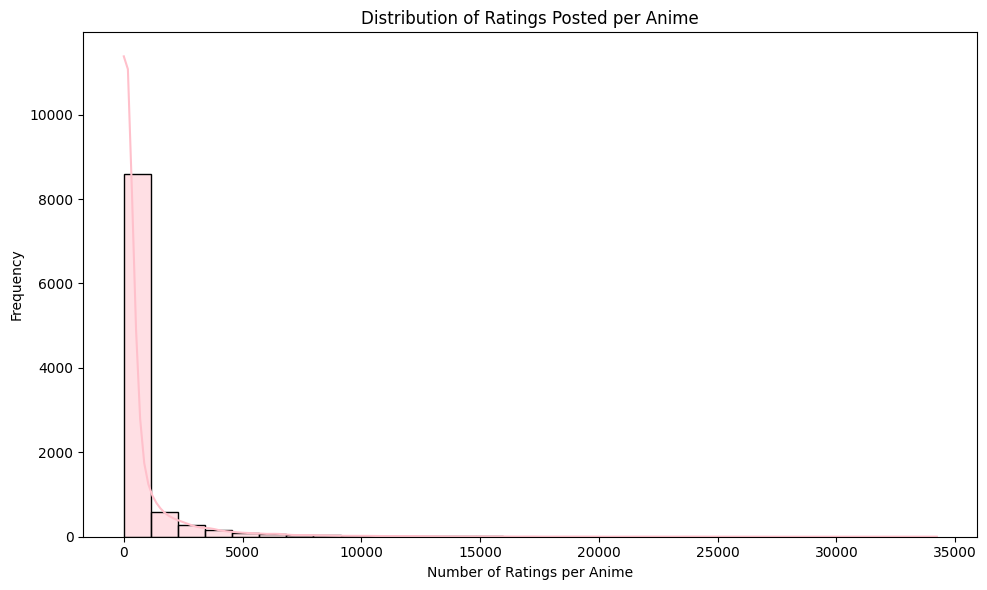

In [ ]:
# Visualize the distribution of the number of ratings per user
ratings_per_user = ratings.groupby('user_id')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=True, color='pink')
plt.title('Distribution of Ratings Posted per User')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the distribution of the number of ratings per anime
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_anime, bins=30, kde=True, color='pink')
plt.title('Distribution of Ratings Posted per Anime')
plt.xlabel('Number of Ratings per Anime')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **3.2.5 Visualize Top Users and Animes with the Most Ratings**

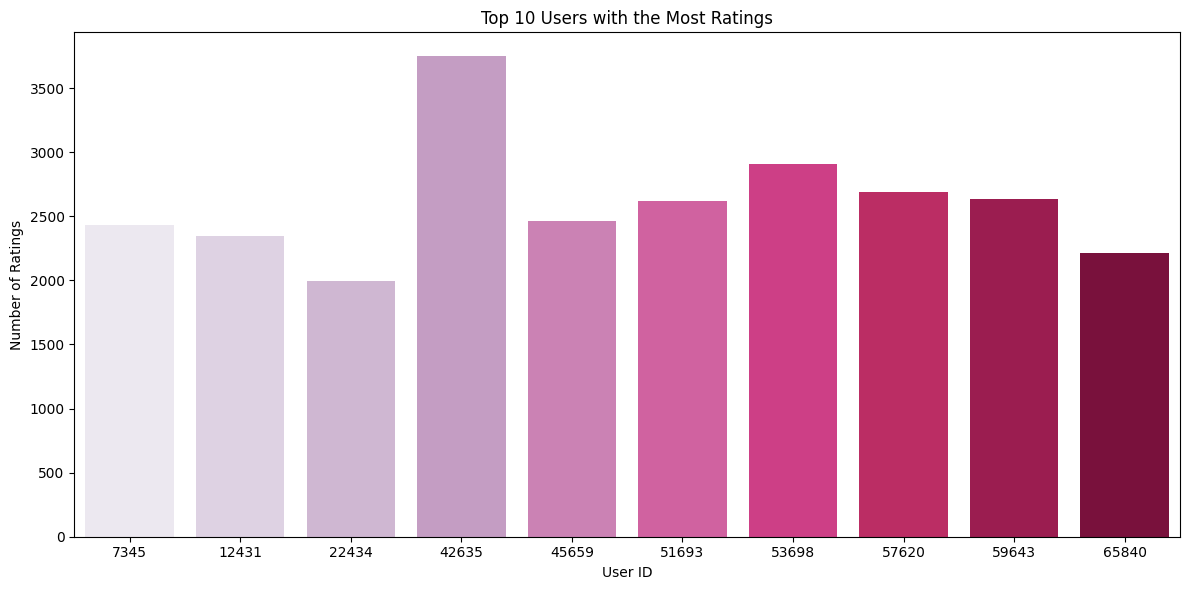

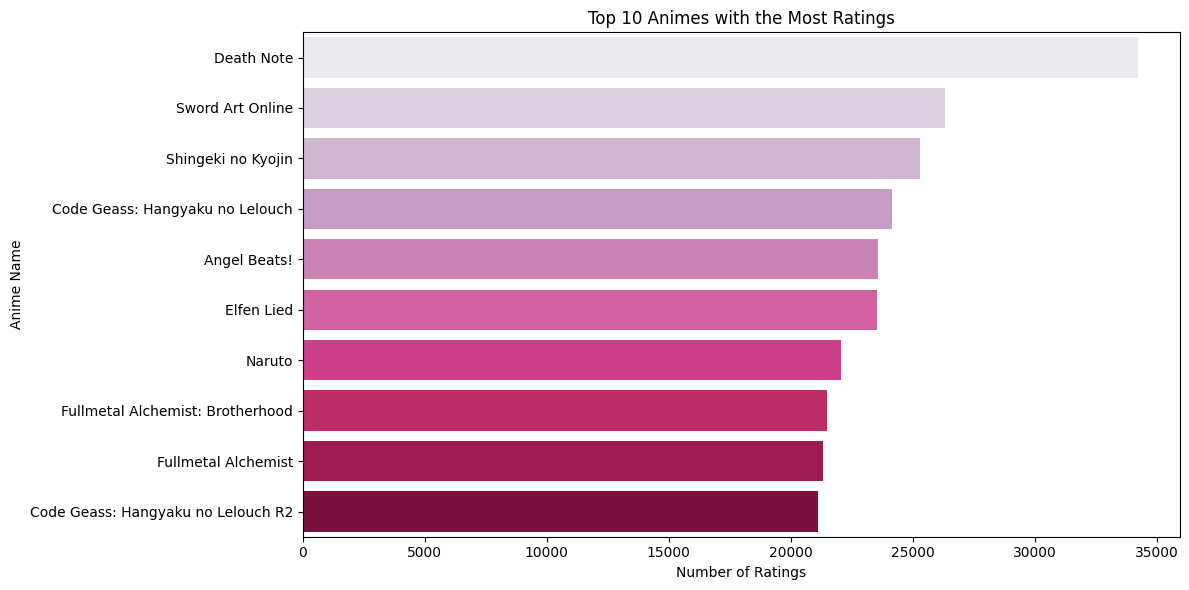

In [ ]:
# Display the top N users with the most ratings
ratings_top_users_ratings = ratings['user_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_top_users_ratings.index, y=ratings_top_users_ratings.values, palette='PuRd')
plt.title('Top 10 Users with the Most Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

# Display the top N animes with the most ratings using anime names
ratings_top_animes_ratings = ratings['anime_id'].value_counts().head(10)

# Merge animes DataFrame to map anime IDs to names
top_animes_with_names = pd.merge(
    pd.DataFrame({'anime_id': ratings_top_animes_ratings.index, 'num_ratings': ratings_top_animes_ratings.values}),
    animes[['anime_id', 'name']],
    left_on='anime_id',
    right_on='anime_id'
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_animes_with_names['num_ratings'], y=top_animes_with_names['name'], palette='PuRd')
plt.title('Top 10 Animes with the Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Anime Name')
plt.tight_layout()
plt.show()

# Create DataFrame for Ratings Per Anime
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]
popular_anime_ratings = filtered_ratings_per_anime_df.index.tolist()

# Create DataFrame for Ratings Per User
ratings_per_user_df = pd.DataFrame(ratings_per_user)
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating <= 1000]
prolific_user_ratings = filtered_ratings_per_user_df.index.tolist()

# Filter based on both popular anime and prolific users
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime_ratings) & ratings.user_id.isin(prolific_user_ratings)]

#### **Top 10 Users with the Most Ratings**

1. **Highly Active Users:**
- The users listed in the top 10 have significantly higher numbers of ratings compared to the general user population.
- This suggests a group of highly active and engaged users who are extensively involved in rating anime content.

2. **Potential Influencers:**
- Users with a large number of ratings may be considered influencers within the community. Their preferences might influence other users' decisions on what anime to watch, especially if they consistently rate titles in a certain way.
- Based on the plot showed, user 42635 appears to be a potential influencer on the platform. The high number of ratings (3747) suggests that this user is extensively engaged in rating anime content.
- Monitoring the preferences and ratings of user 42635 could provide valuable insights into trends and potentially influence the recommendations and decisions of other users on the platform.

#### **Top 10 Animes with the Most Ratings**

1. **Popularity Ranking:**
- The anime "Death Note" (anime_id: 1535) has the highest number of ratings (34226), indicating it is quite popular among users.

2. **Diverse Preferences:**
- The list includes a variety of genres and themes, such as "Sword Art Online" (anime_id: 11757) in the virtual reality gaming genre, "Shingeki no Kyojin" (anime_id: 16498) in the action and fantasy genre, and "Naruto" (anime_id: 20) in the shounen genre.
- This suggests that users have diverse preferences.

3. **Sequels and Franchises:**
- There are instances where multiple entries from the same franchise appear, like "Code Geass: Hangyaku no Lelouch" (anime_id: 1575) and its sequel "Code Geass: Hangyaku no Lelouch R2" (anime_id: 2904).
- This indicates that sequels and related series may also attract significant attention.

4. **Classics:**
- Anime such as "Fullmetal Alchemist: Brotherhood" (anime_id: 5114) and "Fullmetal Alchemist" (anime_id: 121) are present, suggesting that classic and highly acclaimed series continue to receive attention.

5. **Emotional Impact:**
- Titles like "Angel Beats!" (anime_id: 6547) and "Elfen Lied" (anime_id: 226) are known for their emotional impact, and their inclusion in the list may reflect users' interest in emotionally charged narratives.

### **3.2.6 User Ratings Distribution by Anime Type**

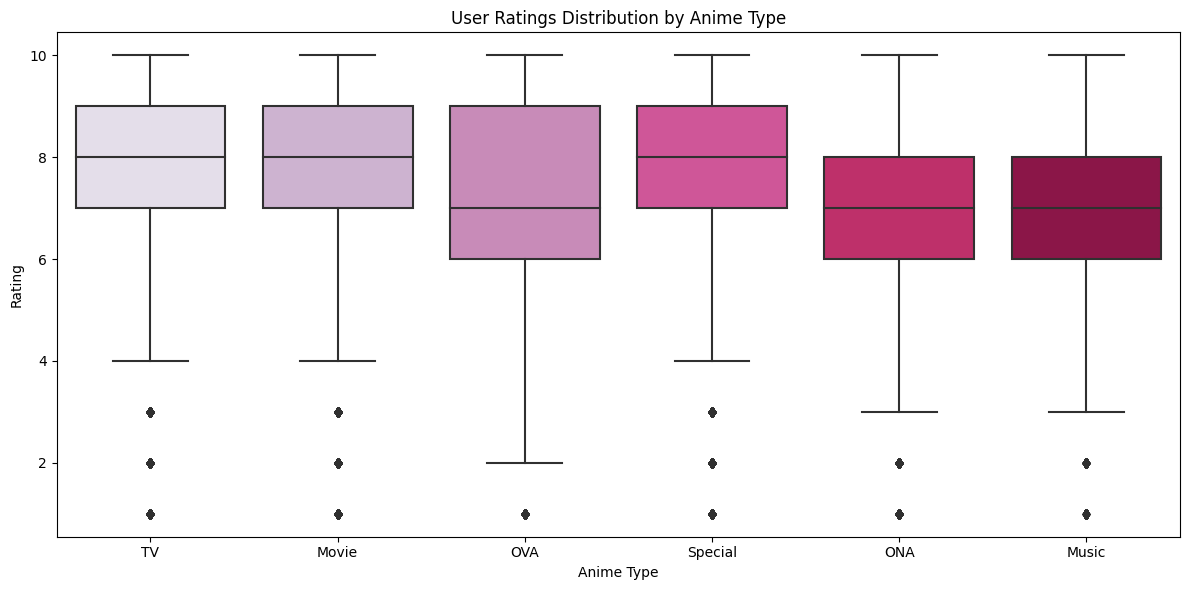

In [ ]:
# User Ratings Distribution by Anime Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=ratings.merge(animes[['anime_id', 'type']], on='anime_id'), palette='PuRd', showfliers=True)
plt.title('User Ratings Distribution by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

1. **TV (Television Series):**
- The median line of the TV shows boxplot is in the middle of the box, it indicates that the median (50th percentile) rating for TV shows is around the middle of the overall range of ratings for TV shows.
- With outliers below the box, it suggests lower ratings for some TV shows.

2. **Movie:**
- The median line of the movie boxplot is in the middle of the box, it means that the median (50th percentile) rating for movies is around the middle of the overall range of ratings for movies.
- Few outliers suggest some movies received exceptionally low ratings.

3. **Special:**
- The median line of the special boxplot is in the middle of the box, it means that the median (50th percentile) rating for special is around the middle of the overall range of ratings for special.
- Few outliers suggest some special received exceptionally low ratings.

4. **OVA (Original Video Animation):**
- The box is wide, indicating variability.
- The median line is lower compared to other, suggesting a lower median rating.
- Outliers suggest some OVAs received very low ratings.

5. **ONA (Original Net Animation) and Music:**
- The boxes for "ONA" and "Music" are positioned in the lower whiskers, it indicates that the majority of the ratings for these anime types are concentrated in the lower range.
- The median line is positioned in the middle of the box.

# **4. Recommendation System**

## **4.1 Data Preparation and Matrix Creation**

In [ ]:
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')
rating_matrix = rating_matrix.fillna(0)
rating_matrix.head()

anime_id,1,5,6,7,15,16,18,19,20,22,...,32281,32282,32379,32438,32542,32729,32828,32935,32998,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,6.0,0.0,6.0,0.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **4.2 Similar User Identification**

In [ ]:
def similar_users(user_id, matrix, k=5):

    # Find similar users to the given user based on cosine similarity.

    # Parameters:
    # - user_id (int): The target user ID.
    # - matrix (pd.DataFrame): The rating matrix.
    # - k (int): Number of similar users to retrieve.

    # Returns:
    # - List of similar user indices.
    # - List of (user_index, cosine_similarity_score) tuples.

    # Check if the user has any ratings
    if user_id not in matrix.index:
        print(f"User {user_id} has no ratings.")
        return [], []

    user = matrix.loc[matrix.index == user_id]
    other_users = matrix.loc[matrix.index != user_id]

    # Check if the other_users DataFrame is not empty
    if other_users.empty:
        print("No other users with ratings.")
        return [], []

    similarities = cosine_similarity(user, other_users)[0].tolist()
    indices = other_users.index.tolist()
    index_similarity = dict(zip(indices, similarities))
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1), reverse=True)
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]

    return users, top_users_similarities

## **4.3 Recommendation Function Definition**

In [ ]:
def recommend_item(user_index, similar_user_indices, matrix, items=5, anime_data=None):

    # Generate item recommendations for a given user based on similar users' ratings.

    # Parameters:
    # - user_index (int): Index of the target user.
    # - similar_user_indices (list): List of indices of similar users.
    # - matrix (pd.DataFrame): The rating matrix.
    # - items (int): Number of items to recommend.

    # Returns:
    # - pd.Series: Series containing mean ratings of similar users for unseen items.
    # - list: List of top N recommended item indices.

   # Get ratings of similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    similar_users_mean = similar_users.mean(axis=0)

    # Ensure the user_index is converted to integer (if needed)
    user_index = int(user_index)

    # Filter ratings of unseen animes from similar users directly in the mean calculation
    similar_users_ratings = similar_users_mean[similar_users_mean.index.isin(matrix.loc[user_index][matrix.loc[user_index] == 0].index)]

    # Sort by mean rating in descending order
    similar_users_ratings_sorted = similar_users_ratings.sort_values(ascending=False)

    # Get top N recommendations
    top_n_anime_indices = similar_users_ratings_sorted.head(items).index.tolist()

    # If anime_data is provided, add anime names to the recommendations
    if anime_data is not None:
        recommendations_with_names = pd.merge(
            pd.DataFrame({'mean_rating': similar_users_ratings_sorted}),
            anime_data[['anime_id', 'name']],
            left_index=True,
            right_on='anime_id'
        )
        return recommendations_with_names, top_n_anime_indices
    else:
        return similar_users_ratings_sorted, top_n_anime_indices

## **4.4 Recommendation Function Definition (Specifically for 'Movie' Anime Type)**

In [ ]:
def recommend_movie(user_index, similar_user_indices, matrix, items=5, anime_data=None):
    # Generate item recommendations for a given user based on similar users' ratings.

    # Parameters:
    # - user_index (int): Index of the target user.
    # - similar_user_indices (list): List of indices of similar users.
    # - matrix (pd.DataFrame): The rating matrix.
    # - items (int): Number of items to recommend.
    # - anime_data (pd.DataFrame): Dataframe containing anime information.

    # Returns:
    # - pd.DataFrame: DataFrame containing mean ratings of similar users for unseen 'Movie' items with names.
    # - list: List of top N recommended 'Movie' item indices.

    # Get ratings of similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    similar_users_mean = similar_users.mean(axis=0)

    # Ensure the user_index is converted to integer (if needed)
    user_index = int(user_index)

    # Filter ratings of unseen 'Movie' animes from similar users directly in the mean calculation
    unseen_movies = matrix.loc[user_index][matrix.loc[user_index] == 0].index
    similar_users_ratings = similar_users_mean[unseen_movies]

    # Sort by mean rating in descending order
    similar_users_ratings_sorted = similar_users_ratings.sort_values(ascending=False)

    # Get top N recommendations
    top_n_movie_indices = similar_users_ratings_sorted.head(items).index.tolist()

    # If anime_data is provided, add 'Movie' names to the recommendations
    if anime_data is not None:
        recommendations_with_names = pd.merge(
            pd.DataFrame({'mean_rating': similar_users_ratings_sorted}),
            anime_data[['anime_id', 'name', 'type']],
            left_index=True,
            right_on='anime_id'
        )
        recommendations_movies = recommendations_with_names[recommendations_with_names['type'] == 'Movie']
        return recommendations_movies, top_n_movie_indices
    else:
        return similar_users_ratings_sorted, top_n_movie_indices

## **4.5 Specific Recommendations for User ID 226**

### **4.5.1 Similar Users to User ID 226**

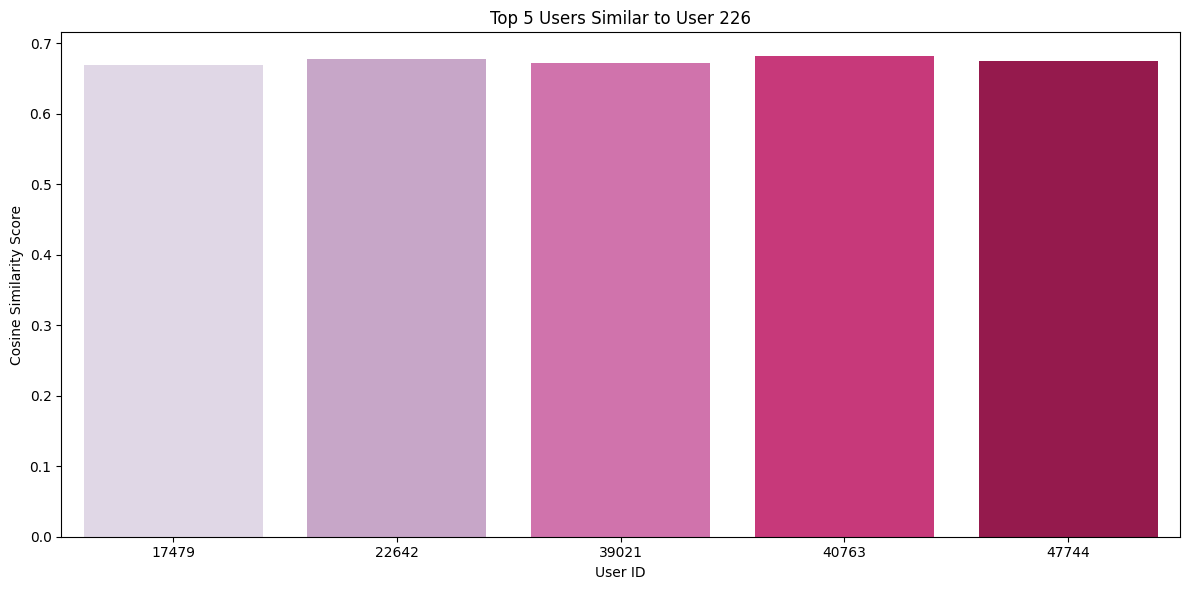

In [ ]:
user_id = 226
similar_user_indices, top_users_similarities = similar_users(user_id, rating_matrix)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=[user[0] for user in top_users_similarities], y=[user[1] for user in top_users_similarities], palette='PuRd')
plt.title(f'Top {len(top_users_similarities)} Users Similar to User {user_id}')
plt.xlabel('User ID')
plt.ylabel('Cosine Similarity Score')
plt.tight_layout()
plt.show()

1. **User IDs of Similar Users:**
- 40763
- 22642
- 47744
- 39021
- 17479

2. **Similarity Scores:**
- 0.681 for user 40763
- 0.678 for user 22642
- 0.674 for user 47744
- 0.673 for user 39021
- 0.669 for user 17479

### **4.5.2 Recommendations for User ID 226**

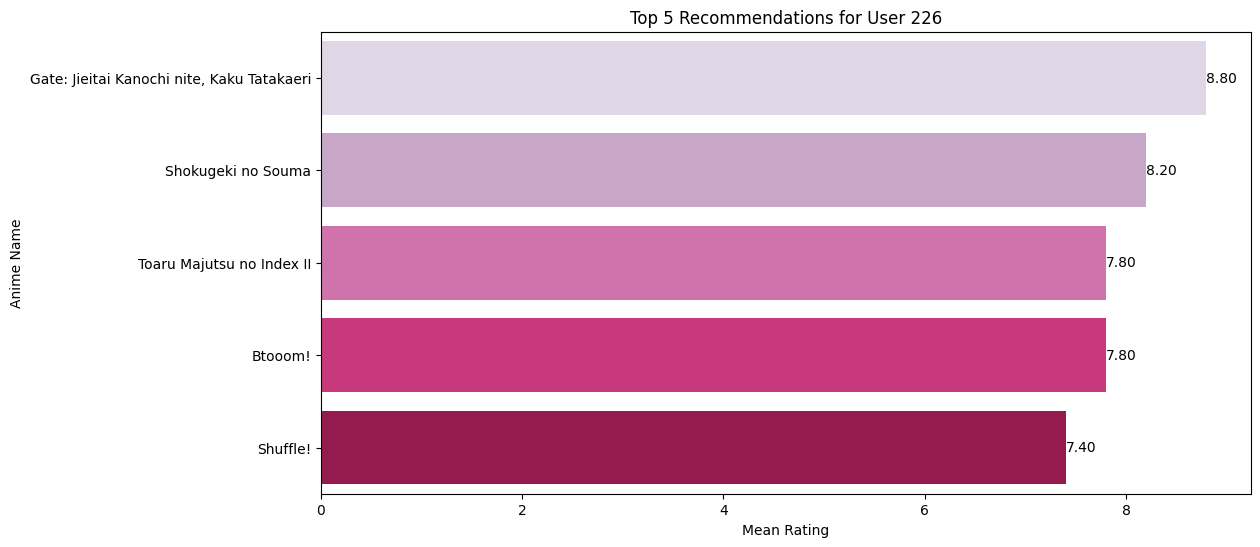

In [ ]:
user_index = 226
similar_user_indices, _ = similar_users(user_index, rating_matrix)
recommendations, top_recommendations_indices = recommend_item(user_index, similar_user_indices, rating_matrix, anime_data=animes)

# Plotting the top 5 recommendations with anime names and text annotations
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=recommendations['mean_rating'].head(5).values, y=recommendations['name'].head(5), palette='PuRd')

# Add text annotations to each bar
for index, value in enumerate(recommendations['mean_rating'].head(5).values):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.title(f'Top 5 Recommendations for User {user_index}')
plt.xlabel('Mean Rating')
plt.ylabel('Anime Name')
plt.show()

1. **"Gate: Jieitai Kanochi nite, Kaku Tatakaeri" (Anime ID: 28907):**
- This anime has a mean rating of approximately 8.33 based on the ratings of users similar to user ID 226.
- It seems to be highly rated by these similar users, suggesting that it might align well with the preferences of user 226.

2. **"Shokugeki no Souma" (Anime ID: 28171):**
- This anime has a mean rating of 8.00 among similar users.
- It's also highly rated, indicating that it could be a good recommendation for user 226.

3. **"Toaru Majutsu no Index II" (Anime ID: 8937):**
- Similar to the previous two, this anime has a mean rating of 7.80 among users similar to user 226.
- It's another potentially suitable recommendation.

4. **"Btooom!" (Anime ID: 14345):**
- This anime has a slightly lower mean rating of 7.67 among similar users.
- While still a decent rating, it might be considered a bit less preferred compared to the others.

5. **"Kill la Kill" (Anime ID: 18679):**
- With a mean rating of 7.67, this anime is similar in rating to "Btooom!" among users similar to user 226.

### **4.5.3 Recommendations for User ID 226 (Specifically for 'Movie' Anime Type)**

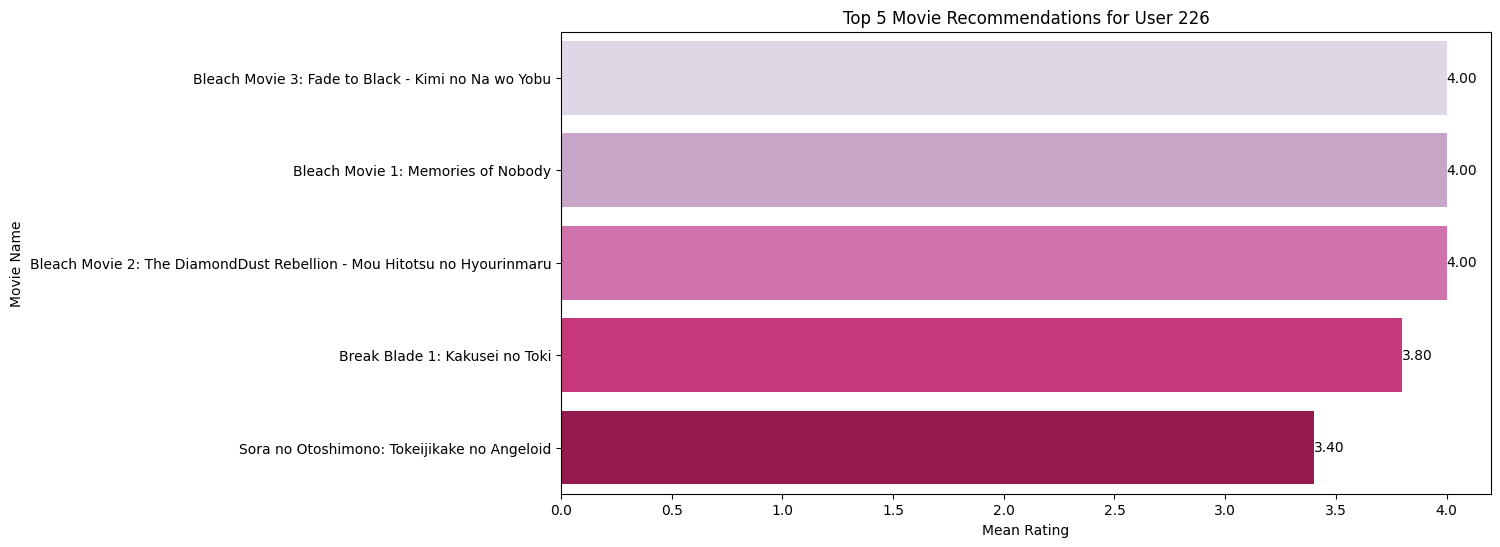

In [ ]:
user_index = 226
similar_user_indices, _ = similar_users(user_index, rating_matrix)
recommendations, top_recommendations_indices = recommend_movie(user_index, similar_user_indices, rating_matrix, anime_data=animes)

# Plotting the top 5 recommendations with 'Movie' names and text annotations
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=recommendations['mean_rating'].head(5).values, y=recommendations['name'].head(5), palette='PuRd')

# Add text annotations to each bar
for index, value in enumerate(recommendations['mean_rating'].head(5).values):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.title(f'Top 5 Movie Recommendations for User {user_index}')
plt.xlabel('Mean Rating')
plt.ylabel('Movie Name')
plt.show()

1. **Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu:**
- Mean Rating: 4.0
- This movie has received a high mean rating of 4.0, indicating that users similar to user 226 have rated it positively.

2. **Bleach Movie 1: Memories of Nobody:**
- Mean Rating: 4.0
- Similar to the first movie, this one also has a mean rating of 4.0, suggesting a positive reception among users with similar preferences.

3. **Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru:**
- Mean Rating: 4.0
- The second Bleach movie also has a high mean rating of 4.0, showing consistent positive feedback from users.

4. **Break Blade 1: Kakusei no Toki:**
- Mean Rating: 3.8
- While slightly lower than the Bleach movies, this movie still has a respectable mean rating of 3.8, indicating favorable reviews.

5. **Sora no Otoshimono: Tokeijikake no Angeloid:**
- Mean Rating: 3.4
- This movie has a mean rating of 3.4, which is the lowest among the top 5 recommendations. It might still be a decent choice, but users may have varied opinions.